In [1]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/code/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=128930 sha256=ed5247167e0db287e00bfa020af42b5888e7edf9916986abf2447bf19ec18e03
  Stored in directory: /tmp/pip-ephem-wheel-cache-20k5lcpr/wheels/37/09/70/7b86f721614374ec311fa16ed21dbb33c1959d2c6f80461dfd
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy
import time
import os

In [2]:
def check_betweenness(bet_moi, bet_mat):
    nb_error = 0
    nb_values = 0
    for v in bet_moi.keys():
        for t in bet_moi[v].keys():
            nb_values += 1
            if (v.lower() in bet_mat ):
                if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                    nb_error +=1
                    print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])
    return nb_error, nb_values

In [3]:
nb_error = 0
repet = 2
res_moi = []
res_matthieu = []
res_matthieu_mem = []
res_events = []
for nb_node in range(4,7,2):
    print(nb_node)
    if nb_error > 0:
        break
    print(nb_node)
    temps_moi = 0
    temps_matthieu = 0
    temps_matthieu_mem = 0
    nb_values = 0
    for rep in range(repet):
        T = [0, 100]
        occurrence_law_node = 'poisson'
        presence_law_node = 'uniform'
        occurrence_param_node = 3
        presence_param_node = 25
        occurrence_law_link = 'poisson'
        presence_law_link = 'uniform'
        occurrence_param_link = 5
        presence_param_link = 15
        p_link = numpy.sqrt(nb_node)/nb_node
        S = sg.erdos_renyi(T,nb_node,occurrence_law_node,occurrence_param_node,presence_law_node,
                   presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
        un_S = bt.to_undirected(S)
        print("fin_undirec")
        SS = un_S.stream_graph_to_link_stream()
        print("fin_to link stream")
        SS.write_to_matthieu_link_stream("any")
        print("fin_write to matthieu")
        start = time.time()
        bt.simulations(SS, "papier")
        end = time.time()
        temps_moi += (end - start)
        print("fin moi")
        
        
        bet_moi = bt.read_dictionary("papier_betweenness.pic")
        cmd = 'mv any_mat.ls archive_code/Test'
        os.system(cmd)
        
        cmd = 'python2 archive_code/betweenness_memoise.py Test/any_mat.ls -1 res'
        start = time.time()
        os.system(cmd)
        end = time.time()
        temps_matthieu_mem += (end- start)
        print("fin mem")
        
        cmd = 'python2 archive_code/betweenness_all.py Test/any_mat.ls -1 res'
        start = time.time()
        os.system(cmd)
        end = time.time()
        temps_matthieu += (end- start)
        print("fin mat")
        
        bet_mat = bt.read_dictionary("res_betweenness.pic")
        error, values = check_betweenness(bet_moi, bet_mat)
        nb_values += values
        nb_error += error
        print("fin check")
        if nb_error > 0:
            SS.write_to_sg("examples/any")
            break
    res_moi.append([nb_node, temps_moi/repet])
    res_matthieu.append([nb_node, temps_matthieu/repet])
    res_matthieu_mem.append([nb_node, temps_matthieu_mem/repet])
    res_events.append([nb_node, nb_values/repet])

        
print("nb_error",nb_error)

4
4
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[11.69718070336091, 74.0114054620512, 86.91523388501271, 87.34426473108041, 100.0, 100.0]
latency and distances finished
fin mem
fin mat
fin check
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[3.1306041741462343, 26.69482142897417, 28.10494637843524, 28.18164179568262, 31.237406293581575, 35.22764352491333, 38.2754143882826, 41.19508818100606, 41.95653817197997, 43.15258000124548, 59.08643513982171, 59.238539734247354, 62.63879236534629, 65.72690960338475, 67.4352375458463, 98.55404271638497, 100.0]
latency and distances finished
fin mem
fin mat
fin check
6
6
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[2.360226908366714, 20.228088236736742, 31.207666060626373, 31.225527988632273, 50.20623707413129, 52.80267300874569, 55.66839993959935, 56.41286365770225, 58.97377475984348, 68.53578882813916, 76.44936162017433, 93.07110776561873, 95.92177121931262, 96

In [4]:
print(nb_error)

0


In [5]:
res_moi

[[4, 0.025435447692871094], [6, 0.018483638763427734]]

In [6]:
res_matthieu_mem

[[4, 0.037703752517700195], [6, 0.06073176860809326]]

In [7]:
res_matthieu

[[4, 0.11840224266052246], [6, 0.3753080368041992]]

In [8]:
res_events

[[4, 44.0], [6, 69.0]]

In [6]:
#SS.write_to_sg("examples/erdos10")


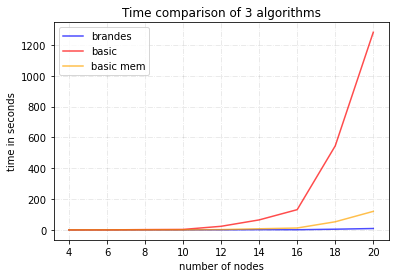

In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.title('Time comparison of 3 algorithms')

xs = [x[0] for x in res_moi]
ys = [x[1] for x in res_moi]
line1 = plt.plot(xs,ys, color='blue', alpha=0.7, label="brandes")
xss = [x[0] for x in res_matthieu]
yss = [x[1] for x in res_matthieu]
line2 = plt.plot(xss,yss, color='red', alpha=0.7, label="basic")
xsss = [x[0] for x in res_matthieu_mem]
ysss = [x[1] for x in res_matthieu_mem]
line3 = plt.plot(xsss,ysss, color='orange', alpha=0.7, label = "basic mem")

plt.ylabel('time in seconds')
plt.xlabel('number of nodes')
plt.legend(loc='best')
plt.grid( color='black', alpha=0.1, linestyle='dashdot')
plt.savefig('time_comp_normal.png')
plt.show()


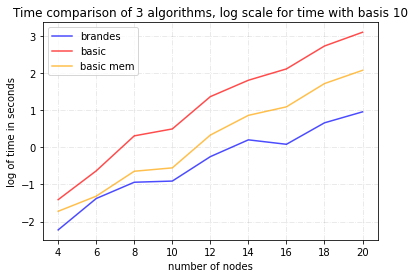

In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure()
plt.title('Time comparison of 3 algorithms, log scale for time with basis 10')

xs = [x[0] for x in res_moi]
ys = [math.log(x[1],10) for x in res_moi]
line1 = plt.plot(xs,ys, color='blue', alpha=0.7, label="brandes")
xss = [x[0] for x in res_matthieu]
yss = [math.log(x[1],10) for x in res_matthieu]
line2 = plt.plot(xss,yss, color='red', alpha=0.7, label="basic")
xsss = [x[0] for x in res_matthieu_mem]
ysss = [math.log(x[1],10) for x in res_matthieu_mem]
line3 = plt.plot(xsss,ysss, color='orange', alpha=0.7, label = "basic mem")

plt.ylabel('log of time in seconds')
plt.xlabel('number of nodes')
plt.legend(loc='best')
plt.grid( color='black', alpha=0.1, linestyle='dashdot')
plt.savefig('time_comp_log.png')
plt.show()
